In [1]:
print("hello world")

hello world


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="McrhzGgUVuaQbO2a1BX6")
project = rf.workspace("chandai").project("lunar-scene-analysis-fejkh")
version = project.version(5)
dataset = version.download("coco-segmentation")


In [4]:
import os

dataset_path = dataset.location  # Roboflow gives the folder path
print("Dataset path:", dataset_path)

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


Dataset path: /content/Lunar-Scene-Analysis-5
Lunar-Scene-Analysis-5/
    README.dataset.txt
    README.roboflow.txt
    test/
        PCAML-Q-065_SCI_N_20131223005831_0005_A_2A_png.rf.eb311bd4d858abbb2a51e5d9cc4764d1.jpg
        chang4_20190111182554_png.rf.76f508aade9cad32eb7667f33ee90338.jpg
        PCAML-C-037_SCI_N_20140112135128_0007_A_2C_png.rf.90b685f59d585fd86e1d9790c6eb4309.jpg
        PCAML-C-023_SCI_N_20140113192333_0008_A_2C_png.rf.870599ab03a765d4f9fff5750b537658.jpg
        C3_TCAM_4_2C_003_png.rf.25a30345618aede7c7d6facd4a0d56ce.jpg
        PCAML-C-003_SCI_N_20140112131356_0007_A_2C_png.rf.6defd12f833e41890d01ab147510eab5.jpg
        PCAML-C-052_SCI_N_20140112140705_0007_A_2C_png.rf.2fff23d6f12dfc76dbb2e295a2db3e0c.jpg
        _annotations.coco.json
        PCAML-Q-017_SCI_N_20131223000232_0005_A_2A_png.rf.2d2fe6413d897f2202495e42bdea0858.jpg
        PCAML-C-046_SCI_N_20140112140050_0007_A_2C_png.rf.6647d486ec8da1b89b7d7f10e9ca7899.jpg
        PCAML-C-039_SCI_N_20140112

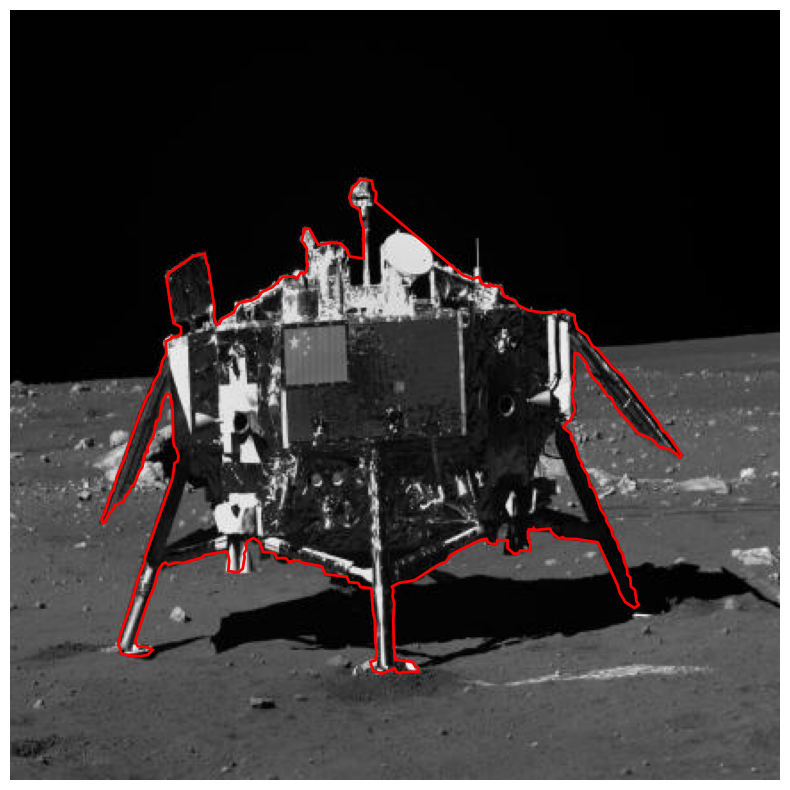

In [5]:
import json
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image
import os

# Choose the split you want to visualize
split = "train"

coco_path = os.path.join(dataset_path, split, "_annotations.coco.json")
images_dir = os.path.join(dataset_path, split)

# Load JSON
with open(coco_path, "r") as f:
    coco = json.load(f)

# Random image
img_info = random.choice(coco["images"])
img_file = os.path.join(images_dir, img_info["file_name"])

# Load image
img = np.array(Image.open(img_file))

# Plot image
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")

# Draw segmentation masks
for ann in coco["annotations"]:
    if ann["image_id"] == img_info["id"]:
        seg = ann["segmentation"][0]  # segmentation is list of polygon points
        poly = np.array(seg).reshape((len(seg)//2, 2))
        plt.gca().add_patch(Polygon(poly, fill=False, edgecolor='red', linewidth=2))

plt.show()


In [6]:
import json, random, os

coco_path = os.path.join(dataset.location, "train", "_annotations.coco.json")
images_dir = os.path.join(dataset.location, "train", "images")

with open(coco_path, "r") as f:
    coco = json.load(f)

cat_map = {c["id"]: c["name"] for c in coco["categories"]}

# pick random image
img_info = random.choice(coco["images"])

print("Image File:", img_info["file_name"])
print("Image ID:", img_info["id"])
print("\nLabels present in this image:")

for ann in coco["annotations"]:
    if ann["image_id"] == img_info["id"]:
        print(f"- Class: {cat_map[ann['category_id']]}")
        print(f"  Category ID: {ann['category_id']}")
        print(f"  Segmentation points: {ann['segmentation'][0][:10]} ...")  # first 10 points
        print()


Image File: PCAML-Q-084_SCI_N_20131223011152_0005_A_2A_png.rf.e86a4545c30bc033adf989fc7e3e8dd9.jpg
Image ID: 105

Labels present in this image:
- Class: crater
  Category ID: 3
  Segmentation points: [0, 214.753, 7.892, 215.16, 30.614, 212.108, 53.156, 211.584, 74.957, 206.152] ...

- Class: rocky region
  Category ID: 5
  Segmentation points: [127.135, 49.419, 120.538, 50.305, 116.807, 54.812, 109.507, 51.286, 103.522, 45.58] ...

